# Tâches n° 8: Analyse de la structure de bande du matériau "LiLuO2"

Cette fois, il n'est pas nécessaire de télécharger la structure du matériau. Il faut uniquement télécharger la structure de bande de celui-ci. Pour réaliser cela la référence n°1 est utilisée.

In [1]:
#from pymatgen.ext.matproj import SpacegroupAnalyzer
#from pymatgen.electronic_structure.dos  import DOS 
#from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter 
#from pymatgen.electronic_structure.plotter import BSDOSPlotter
from pymatgen.ext.matproj import MPRester
#import matplotlib.image as mpimg
#import matplotlib.pyplot as plt

with MPRester("xWGoUhg0LtBEwfAi") as m:
    bs = m.get_bandstructure_by_material_id("mp-754537")
    dos = m.get_dos_by_material_id("mp-754537")

# 0) Graphe de la structure de bande
Permet de faciliter la visualisation du problème.

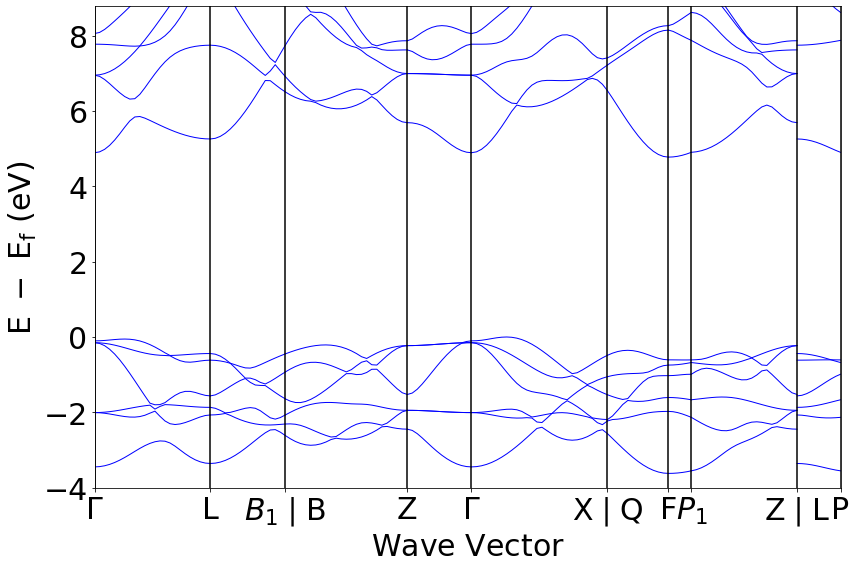

In [3]:
BSPlotter(bs).show()
#Fonction peut être trouvée grâce à la référence n°3

## 1) La bande interdite

In [4]:
print("La bande interdite a une valeur ", bs.get_band_gap()['energy'], "eV")
#Cette fonction est trouvée grâce à la référence n°2

La bande interdite a une valeur  4.7738 eV


## 2.1) Direction où la dernière bande de valence présente le plus et le moins de dispersion.

Pour commencer il est nécessaire de déterminer les informations de cette dernière bande de valence. Par exemple, sur l'ensemble des bandes, la quantième est-ce ?

Pour répondre à cette question, on utilise une fonction donnant toutes les informations sur un point bien précis : le points le plus haut en énergie de la bande de valence (qui se trouve bien entendu sur celle-ci). Cette fonction retourne un dictionnaire, il est donc facile de trouver les informations recherchées.

In [5]:
print(bs.get_vbm()["band_index"])
#trouvé grâce à la référence n°2

defaultdict(<class 'list'>, {<Spin.up: 1>: [11]})


Sur les informations données ci-dessus, on voit que la dernière bande de valence est la 11ème bande électronique du matériau. 
On peut donc déterminer les différents couple (energie,distance) de cette bande. 

----
Pour cela, on utilise une fonction "bs_plot_data()" qui permet de récupérer l'ensemble des données nécéssaires pour réaliser le graphe de bandes de structure qui se trouve au point 0) du Notebook ci-dessus.

In [ ]:
d = BSPlotter(bs).bs_plot_data() ##l'ensemble des données du graphe sous forme d'un dictionnaire
# Cette fonction a été trouvée grâce à la référence n°3

### Les énergies

In [ ]:
d["energy"][0]["1"][11] 
# d["energy"] donne accès à la partie energie du dictionnaire d 
#le [0] correspond aux valeurs de l'énergie dans la première partie du graphe (entre Γ et L ) (voir graphe ci-dessus)
#le ["1"] indique le spin 
#le [11] est l'index de la 11ème bande : la dernière bande de valence
#Ce qui apparait est donc l'ensemble des valeurs de l'énergie sur cette bande à cet endroit précis du graphe

### Les positions

In [ ]:
print(d["ticks"]["distance"])
# d["ticks"] donne accès à la partie ticks du dictionnaire d
# ["distances"] donne accès à la partie distance de la partie ticks
# ces distances représente les positions de chaque symboles du graphe
print(d["ticks"]["label"])
#représente les symboles des positions du graphes

Dans la liste dans `d["ticks"]["distance"]` et `d["ticks"]["label"]`  certains des éléments sont données **deux fois d'affilées**. Pour se faciliter la vie pour la suite, les élements identiques **qui se suivent dans la liste** sont supprimés. 

In [ ]:
ddistance = list(set(d["ticks"]["distance"]))
# Pour le label on doit travaillé autrement car on ne peut pas simplement supprimer l'ensemble des doublons.
# En effet, si on regarde sur le graphe ci-dessus le gamma est utilisé deux fois dans le graphe mais il ne faut pas le
# retirer car il n'est pas donné deux fois d'affilée dans la liste.
#Je procède donc au cas par cas.
dlab = d["ticks"]["label"]
print("Avant", dlab)
dlab.remove('L')
dlab.remove('Z')
dlab.remove('F')
dlab.remove('$P_1$')
del dlab[4]
print("Après", dlab)
print(ddistance)
# On voit qu'on a bien retiré les élements quand ils étaient données deux fois d'affilés.

Avec ces informations, le graphe peut être parcouru de gauche à droite par itération.

----

Je vais procéder de cette manière : 
Prenons le cas de la première itération par exemple : 
- Les valeurs de l'énergie en Γ et en L seront prise 
- La distance de cette partie est récupérée 
- Le calcul de la pente sera effectuée c'est-à-dire : (energie en L - energie Γ ) / distance
- A chaque itération je vérifierais si cette pente est plus grande ou plus petite de la précédente et je pourrais trouver ainsi la dispertion la plus grande et la plus petite.


In [ ]:
pentemin = 999999
pentemax = -999999
endroitmax = 0
endroitmin = 0
for i in range(0,9) :
    lend = len(d["energy"][i]["1"][11])
    
    eg = d["energy"][i]["1"][11][0] #première énergie des valeurs d'onde
    ed = d["energy"][i]["1"][11][lend-1] #dernière énergie
    
     
    pg = ddistance[i] #position à gauche
    pd = ddistance[i+1] #position à droite

    
    pente = abs((eg-ed)/(pg-pd))
    
    if (pente > pentemax) :
        pentemax = pente
        endroitmaxg = dlab[i]
        endroitmaxd = dlab[i+1]  
        
    if (pente < pentemin) :
        pentemin = pente 
        endroitming = dlab[i]
        endroitmind = dlab[i+1] 

print("Dispersion max :", "pente", pentemax, "et la direction est ", endroitmaxg, "-", endroitmaxd ) 
print("Dispersion min :", "pente", pentemin, "et la direction est ", endroitming, "-", endroitmind)              

## 2.2) Direction où la première bande de conduction présente le plus et le moins de dispersion.

Le même raisonnement est effectué pour la bande de conduction. 

In [ ]:
print(bs.get_cbm()["band_index"]) #comme attendu, la bande de conduction trouve à la bande n°12

In [ ]:
pentemin = 999999
pentemax = -999999
endroitmax = 0
endroitmin = 0
for i in range(0,9) :
    lend = len(d["energy"][i]["1"][12])
    
    eg = d["energy"][i]["1"][12][0]
    ed = d["energy"][i]["1"][12][lend-1]
    
     
    pg = ddistance[i]
    pd = ddistance[i+1]

    
    pente = abs((eg-ed)/(pg-pd))

    if (pente > pentemax) :
        pentemax = pente
        endroitmaxg = dlab[i]
        endroitmaxd = dlab[i+1]  
        
    if (pente < pentemin) :
        pentemin = pente 
        endroitming = dlab[i]
        endroitmind = dlab[i+1] 

print("Dispersion max :", "pente", pentemax, "et la direction est ", endroitmaxg, "-", endroitmaxd ) 
print("Dispersion min :", "pente", pentemin, "et la direction est ", endroitming, "-", endroitmind)       

## 2.3) Le graphe contenant les flêches indiquant la dispersion: 

![Graphe avec flêche](graphe.png "Graphe avec flêche")

Au centre, j'ai rajouté les numéros se rapportant aux différentes tranches du graphes analysés

## 3.0) Masse effective : Les équations utilisées

Après quelques recherches sur internet, je suis tombée sur les références n°4 et n°5. 
J'utilise donc l'équation ci-dessous car nos hypothèses le permettent.

$E(k)-E_{g} = \frac{\hbar^{2}\cdot k^{2}}{2 \cdot m^{*}}$

-----

Avec, 

- $E(k)$ est l'énergie d'une électron de vecteur d'onde k en $[1/nm]$ = $10^9 [m]$
- $E_{g}$ la valeure de la bande interdite : $4.7738 eV$
- $\hbar$ la constante de Planck : $6,62607004 × 10^{-34}$ $\frac{kg\cdot m^{2}}{s}$

## 3.1) Masse effective au sommet de la dernière bande de valence.

In [ ]:
evalence = (bs.get_vbm()["energy"])* 1.60218**(-19) #E(k) en J
kindex = bs.get_vbm()['kpoint_index']
eg = (bs.get_band_gap()['energy']) *1.60218**(-19)
hbar = 6.62607004 * 10**(-34)
kv = bs.as_dict()["kpoints"][kindex[0]]
truekv = ((k[0]*10**9)**2+(k[1]*10**9)**2+(k[2]*10**9)**2)

In [ ]:
mev = (hbar**2 * truekv)/(2*(evalence - eg))
print(mev)

## 3.2) Masse effective à la base de la dernière bande de conduction.

In [ ]:
econdu = (bs.get_cbm()["energy"])* 1.60218**(-19) #Ek en J
kindex = bs.get_cbm()['kpoint_index']
kc = bs.as_dict()["kpoints"][kindex[0]]
truekc = ((k[0]*10**9)**2+(k[1]*10**9)**2+(k[2]*10**9)**2)

In [ ]:
mec = (hbar**2 * truekc)/(2*(econdu - eg))
print(mec)

Comme attendu, une valeur négative est bien obtenu pour la masse effective de la bande de valence et une valeur positive pour la masse effective de conduction. 

# Références : 
1. [pymatgen.ext.matproj](https://pymatgen.org/pymatgen.ext.matproj.html?highlight=get_bandstructure_by_material_id#pymatgen.ext.matproj.MPRester.get_bandstructure_by_material_id)

2. [pymatgen.electronic_structure.bandstructure](https://pymatgen.org/pymatgen.electronic_structure.bandstructure.html) 
3. [pymatgen.electronic_structure.plotter](https://pymatgen.org/pymatgen.electronic_structure.plotter.html)
4. [Effective Mass](http://folk.uio.no/ravi/cutn/semiphy/6.l7_intrinsic-extrinsic.pdf)
5. [Effective mass (solid-state physics)](https://en.wikipedia.org/wiki/Effective_mass_(solid-state_physics))